In [1]:
import numpy as np
import matplotlib.pyplot as plt

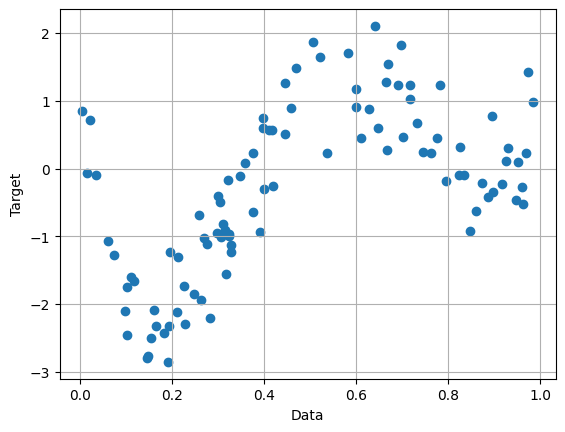

In [2]:
#データ数
n = 100
#データを生成するための関数の定義
def true_func(x):
    z = 1-48*x+218*x**2-315*x**3+145*x**4
    return z

data = np.random.rand(n).astype(np.float32)
data = np.sort(data) #データを小さい順に並び替え
target = true_func(data) #データに対応する正解データ

#ノイズを加える
target = target + 0.5 * np.random.randn(n)

#作成したデータをプロット
plt.scatter(data, target)
plt.ylabel('Target')
plt.xlabel('Data')
plt.grid()
plt.show()

In [3]:
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

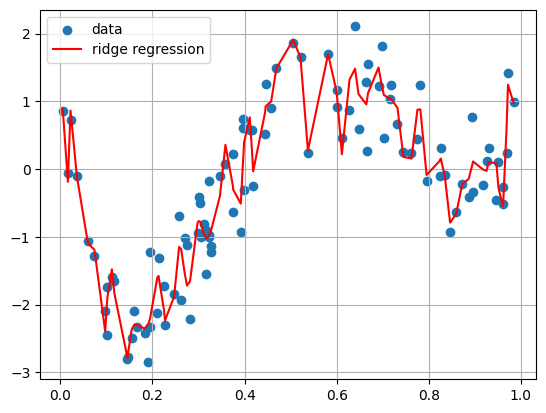

0.9186693691096215


In [5]:
data = data.reshape(-1, 1)
target = target.reshape(-1, 1)


# ガウス型基底関数によるの非線形変換
kx = rbf_kernel(X=data, Y=data, gamma=500)

# 線形回帰によるパラメータ学習
clf = LinearRegression()
clf.fit(kx, target)

#学習モデルによる予測
p_lin = clf.predict(kx)


# グラフ作成
plt.scatter(data, target,label='data')
plt.plot(data, p_lin, color='red', linestyle='-',label='ridge regression')
plt.legend()
plt.grid()
plt.show()

# 決定係数の算出
print(clf.score(kx, target))


##過学習が起きていることがわかる

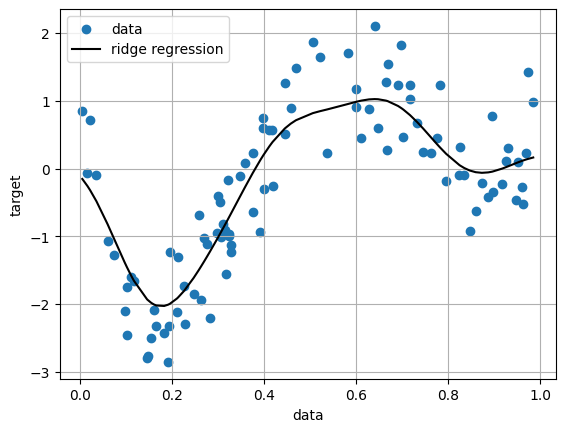

0.8035139558239316


In [6]:
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Ridge

#リッジ正則化を用いたモデル

kx = rbf_kernel(X=data, Y=data, gamma=100)

clf = Ridge(alpha=30) #リッジ回帰モデル
clf.fit(kx, target)

p_ridge = clf.predict(kx)

plt.scatter(data, target,label='data')
plt.plot(data, p_ridge, color='black', linestyle='-',label='ridge regression')
plt.ylabel('target')
plt.xlabel('data')
plt.legend(loc=2)
plt.grid()
plt.show()

print(clf.score(kx, target))

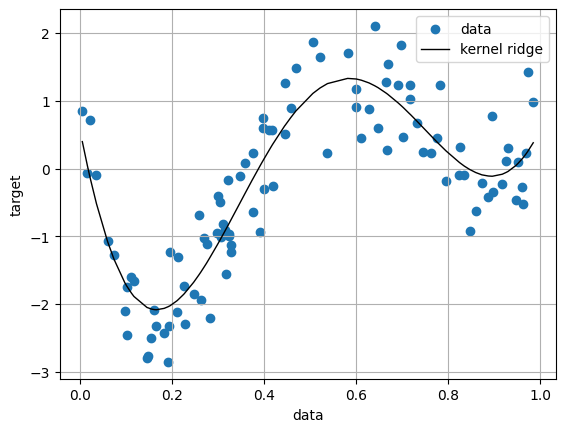

0.8279039320253723


In [7]:
from sklearn.kernel_ridge import KernelRidge

#カーネルリッジ回帰モデル
#ガウス型基底関数とリッジ正則化を用いたモデル


clf = KernelRidge(alpha=0.0002, kernel='rbf') #KernelRidge

data = data.reshape(-1,1)
target = target.reshape(-1,1)

clf.fit(data, target)

p_kridge = clf.predict(data)

plt.scatter(data, target, label='data')
plt.plot(data, p_kridge, color='black', linestyle='-', linewidth=1, label='kernel ridge')
plt.ylabel('target')
plt.xlabel('data')
plt.legend()
plt.grid()
plt.show()

print(clf.score(data, target))